In [2]:
from scipy.io import loadmat       # Import function to read data.
from pylab import *                # Import numerical and plotting functions
from IPython.lib.display import YouTubeVideo  # Enable YouTube videos
rcParams['figure.figsize']=(12,3)  # Change the default figure size

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


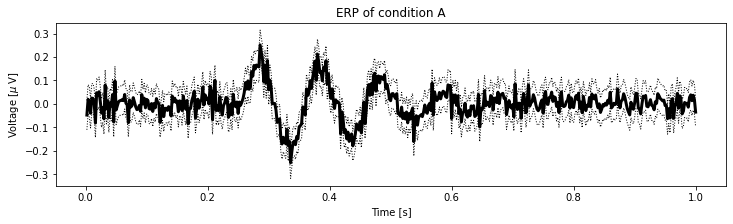

In [4]:


data = loadmat("/content/gdrive/MyDrive/Colab Notebooks/Data/Python EEG/Case-Studies-Python-student/matfiles/02_EEG-1.mat")                # Load the data,
EEGa = data['EEGa']                             # ... and get the EEG from one condition,
t = data['t'][0]                                # ... and a time axis,
ntrials = len(EEGa)                             # ... and compute the number of trials.

mn = EEGa.mean(0)                               # Compute the mean signal across trials (the ERP).
sd = EEGa.std(0)                                # Compute the std of the signal across trials.
sdmn = sd / sqrt(ntrials)                       # Compute the std of the mean.

plot(t, mn, 'k', lw=3)                          # Plot the ERP of condition A,
plot(t, mn + 2 * sdmn, 'k:', lw=1)              # ... and include the upper CI,
plot(t, mn - 2 * sdmn, 'k:', lw=1)              # ... and the lower CI.
xlabel('Time [s]')                              # Label the axes,
ylabel('Voltage [$\mu$ V]')
title('ERP of condition A')                     # ... provide a useful title,
show()                                          # ... and show the plot.

# Background

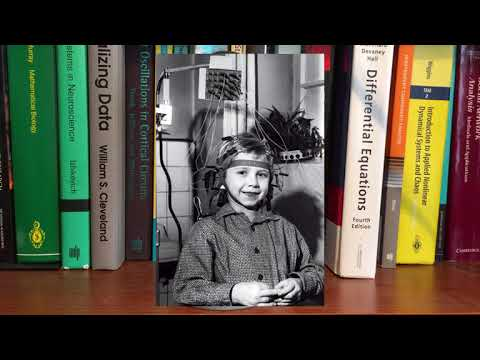

In [5]:
YouTubeVideo('Cy_BF7smAkk')

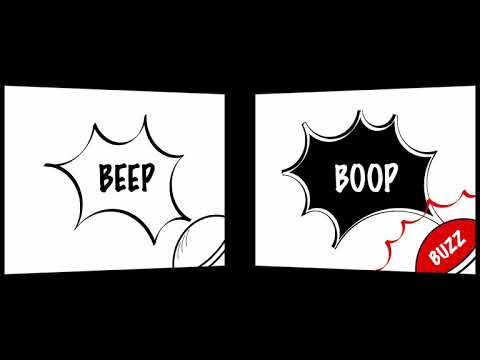

In [7]:
YouTubeVideo('q2-DjvPRaNA')

# Data Analysis

In [6]:
data.keys()

# EEGa to condition A and EEGb to condition B. 
# t for time

dict_keys(['__header__', '__version__', '__globals__', 'EEGa', 'EEGb', 't'])

In [8]:
# Extracting the data
EEGa = data['EEGa']
EEGb = data['EEGb']
t = data['t'][0]

In [10]:
# Describing t 
print(data['t'].shape)
print(t.shape)
print(len(data['t']))
print(len(data['t'][0]))

(1, 500)
(500,)
1
500


In [11]:
# Describing the rest of the data
whos

Variable                     Type                          Data/Info
--------------------------------------------------------------------
ALLOW_THREADS                int                           1
Annotation                   type                          <class 'matplotlib.text.Annotation'>
Arrow                        type                          <class 'matplotlib.patches.Arrow'>
Artist                       type                          <class 'matplotlib.artist.Artist'>
AutoLocator                  type                          <class 'matplotlib.ticker.AutoLocator'>
Axes                         type                          <class 'matplotlib.axes._axes.Axes'>
AxisError                    type                          <class 'numpy.AxisError'>
BUFSIZE                      int                           8192
BitGenerator                 type                          <class 'numpy.random.bit_generator.BitGenerator'>
Button                       type                          <clas

In [13]:
# Extract number of trials
# In the data EEGa and EEGb each row corresponds to a separate trial, and each column to a point in time. There are 1000 trials and each trial has 500 time points
ntrials, nsamples = EEGa.shape

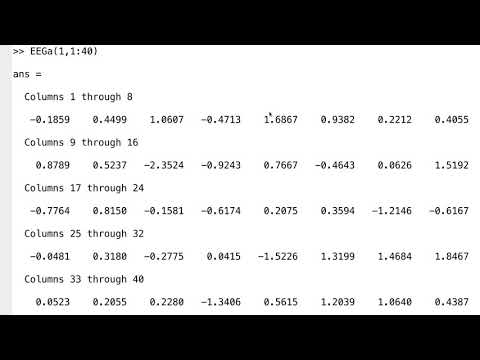

In [14]:
YouTubeVideo('uSjd41G-yNY')

In [18]:
print( EEGa[0,:40] )

[-0.18590963  0.44987601  1.06070801 -0.47126525  1.68669327  0.93822134
  0.22120704  0.40549128  0.87887967  0.52369783 -2.35240678 -0.92434588
  0.7666718  -0.464255    0.06259532  1.51917029 -0.77640081  0.81498874
 -0.15813729 -0.61740252  0.20750639  0.35943087 -1.21455008 -0.61671545
 -0.0481362   0.31798269 -0.27745959  0.04148398 -1.52257779  1.31993666
  1.46836023  1.846661    0.0523164   0.20551538  0.22799468 -1.34063464
  0.56145165  1.20391968  1.06398658  0.43874824]


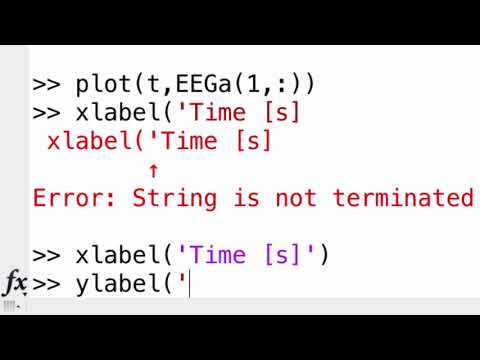

In [19]:
YouTubeVideo('9qx29zDxcAc')

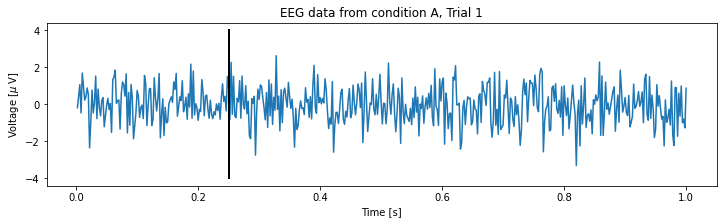

In [38]:
plot(t, EEGa[0,:])                     # Plot condition A, trial 1 data vs t.
xlabel('Time [s]')                   # Label the x-axis as time.
ylabel('Voltage [$\mu$ V]')          # Label the y-axis as voltage.
title('EEG data from condition A, Trial 1')  # Add a title

# Add a vertical line to indicate the stimulus time
plot([0.25, 0.25], [-4,4], 'k', lw=2)
show()

In [34]:
dt = t[1] - t[0]  # Determine the sampling interval
dt

0.002